**Cours Humanités numériques spatialisées - Master HNC de PSL**

## Analyse des données du recensement de la population des communes du département 93 - TP en Python

*Objectifs* :
- analyse des données en vue de leur cartographie
- spatialisation des données thématiques à l'aide de référentiels géographiques
- opérateurs spatiaux et jointures

*Bibliothèques Python* : pandas, geopandas, matplotlib, folium, mapclassify


### Exploration de données INSEE sur la population pour la France Métropolitaine

Données publiées en 2019 disponible : https://www.insee.fr/fr/statistiques/6456153?sommaire=6456166

In [ ]:
!git clone https://github.com/PSIG-EHESS/TAIS.git
data_folder = "TAIS/donnees/"

# https://education.github.com/git-cheat-sheet-education.pdf

Cloning into 'TAIS'...
remote: Enumerating objects: 258, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 258 (delta 28), reused 8 (delta 2), pack-reused 191 (from 1)
Receiving objects: 100% (258/258), 80.55 MiB | 24.90 MiB/s, done.
Resolving deltas: 100% (103/103), done.


In [ ]:
import zipfile
with zipfile.ZipFile(data_folder+"INSEE/base-cc-evol-struct-pop-2019.zip","r") as zip_ref:
  zip_ref.extractall(data_folder+"INSEE")

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
evol_pop_insee = pd.read_csv(data_folder+"INSEE/" + "base-cc-evol-struct-pop-2019.CSV", sep=";")
print("le nombre de lignes de ce tableau est: " + str(len(evol_pop_insee)))


le nombre de lignes de ce tableau est: 34983


<ipython-input-4-f9e1f97c0472>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  evol_pop_insee = pd.read_csv(data_folder+"INSEE/" + "base-cc-evol-struct-pop-2019.CSV", sep=";")


In [ ]:
evol_pop_insee

,CODGEO,P19_POP,P19_POP0014,P19_POP1529,P19_POP3044,P19_POP4559,P19_POP6074,P19_POP7589,P19_POP90P,P19_POPH,...,C08_POP2554_CS8,C08_POP55P,C08_POP55P_CS1,C08_POP55P_CS2,C08_POP55P_CS3,C08_POP55P_CS4,C08_POP55P_CS5,C08_POP55P_CS6,C08_POP55P_CS7,C08_POP55P_CS8
0,1001,779,158.508629,102.468339,131.523972,194.112147,131.050309,56.014471,5.322133,397.885214,...,19.506782,230.180025,7.802713,3.901356,3.901356,3.901356,11.704069,11.704069,167.758323,19.506782
1,1002,256,58.646351,29.609476,74.028483,38.684019,35.381928,17.582020,2.067723,129.517516,...,0.000000,62.707071,3.919192,0.000000,0.000000,7.838384,0.000000,3.919192,39.191919,7.838384
2,1004,14134,2642.167045,3076.783602,2730.398468,2391.347109,2054.139468,1044.007592,195.156716,6790.643609,...,499.056841,3383.863275,0.000000,65.525259,101.958474,128.537082,153.154388,132.443296,2510.258601,291.986176
3,1005,1751,346.859147,268.250842,362.580808,380.267677,272.181257,111.034231,9.826038,877.465208,...,27.150990,380.113861,0.000000,7.757426,7.757426,7.757426,7.757426,11.636139,306.418317,31.029703
4,1006,112,12.218182,16.290909,15.272727,29.527273,27.490909,10.181818,1.018182,63.127273,...,0.000000,32.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.600000,8.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34978,97420,24065,5706.444105,4877.987702,4640.069455,5256.374356,2604.670639,902.029424,77.424318,11489.291675,...,1784.896063,3053.165189,30.026051,72.679065,48.487891,77.948371,220.640061,163.153322,1770.515616,669.714813
34979,97421,7136,1711.000000,1321.000000,1289.000000,1575.000000,858.000000,354.000000,28.000000,3655.000000,...,865.950752,1342.287758,35.425258,19.680699,11.808419,15.744559,94.467355,90.531215,755.802930,318.827322
34980,97422,79824,17965.710576,16081.862311,14636.246671,16582.101722,10535.209215,3678.636613,344.232891,38326.445210,...,6451.328490,12468.623664,163.134257,242.582775,262.338092,309.313792,591.250309,382.464105,8237.308418,2280.231916
34981,97423,7015,1389.693054,1286.152394,1284.135423,1708.032693,947.626169,349.944477,49.415791,3473.207273,...,644.657845,1155.667112,19.654203,11.792522,0.000000,15.723362,133.648578,51.100927,672.173728,251.573793


Choix d'un index pour ce dataframe, CODGEO, qui correspond au code INSEE de la commune

In [ ]:
evol_pop_insee = evol_pop_insee.set_index("CODGEO")

Fonction pour convertir le CODGEO en caractères d'une longueur de 5, une conséquence est l'ajout d'autant de zéros qu'il faut à gauche du chiffre

In [ ]:
evol_pop_insee.index = evol_pop_insee.index.astype(str).str.zfill(5)

In [ ]:
evol_pop_insee

,P19_POP,P19_POP0014,P19_POP1529,P19_POP3044,P19_POP4559,P19_POP6074,P19_POP7589,P19_POP90P,P19_POPH,P19_H0014,...,C08_POP2554_CS8,C08_POP55P,C08_POP55P_CS1,C08_POP55P_CS2,C08_POP55P_CS3,C08_POP55P_CS4,C08_POP55P_CS5,C08_POP55P_CS6,C08_POP55P_CS7,C08_POP55P_CS8
CODGEO,,,,,,,,,,,,,,,,,,,,,
01001,779,158.508629,102.468339,131.523972,194.112147,131.050309,56.014471,5.322133,397.885214,82.647627,...,19.506782,230.180025,7.802713,3.901356,3.901356,3.901356,11.704069,11.704069,167.758323,19.506782
01002,256,58.646351,29.609476,74.028483,38.684019,35.381928,17.582020,2.067723,129.517516,27.763308,...,0.000000,62.707071,3.919192,0.000000,0.000000,7.838384,0.000000,3.919192,39.191919,7.838384
01004,14134,2642.167045,3076.783602,2730.398468,2391.347109,2054.139468,1044.007592,195.156716,6790.643609,1345.582680,...,499.056841,3383.863275,0.000000,65.525259,101.958474,128.537082,153.154388,132.443296,2510.258601,291.986176
01005,1751,346.859147,268.250842,362.580808,380.267677,272.181257,111.034231,9.826038,877.465208,181.781706,...,27.150990,380.113861,0.000000,7.757426,7.757426,7.757426,7.757426,11.636139,306.418317,31.029703
01006,112,12.218182,16.290909,15.272727,29.527273,27.490909,10.181818,1.018182,63.127273,8.145455,...,0.000000,32.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.600000,8.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97420,24065,5706.444105,4877.987702,4640.069455,5256.374356,2604.670639,902.029424,77.424318,11489.291675,2829.707809,...,1784.896063,3053.165189,30.026051,72.679065,48.487891,77.948371,220.640061,163.153322,1770.515616,669.714813
97421,7136,1711.000000,1321.000000,1289.000000,1575.000000,858.000000,354.000000,28.000000,3655.000000,935.000000,...,865.950752,1342.287758,35.425258,19.680699,11.808419,15.744559,94.467355,90.531215,755.802930,318.827322
97422,79824,17965.710576,16081.862311,14636.246671,16582.101722,10535.209215,3678.636613,344.232891,38326.445210,9216.860896,...,6451.328490,12468.623664,163.134257,242.582775,262.338092,309.313792,591.250309,382.464105,8237.308418,2280.231916


Diccionnaire des variables :
https://www.insee.fr/fr/statistiques/6456153?sommaire=6456166#dictionnaire

Nous allons nous intéresser à ces variables :

*   CODGEO : Code du département suivi du numéro de commune ou du numéro d'arrondissement municipal
*   P19_POP : population en 2019
*   P13_POP : Population en 2013
*   P08_POP : Population en 2008


In [ ]:
list(evol_pop_insee.index.values)

['01001',
 '01002',
 '01004',
 '01005',
 '01006',
 '01007',
 '01008',
 '01009',
 '01010',
 '01011',
 '01012',
 '01013',
 '01014',
 '01015',
 '01016',
 '01017',
 '01019',
 '01021',
 '01022',
 '01023',
 '01024',
 '01025',
 '01026',
 '01027',
 '01028',
 '01029',
 '01030',
 '01031',
 '01032',
 '01033',
 '01034',
 '01035',
 '01036',
 '01037',
 '01038',
 '01039',
 '01040',
 '01041',
 '01042',
 '01043',
 '01044',
 '01045',
 '01046',
 '01047',
 '01049',
 '01050',
 '01051',
 '01052',
 '01053',
 '01054',
 '01056',
 '01057',
 '01058',
 '01060',
 '01061',
 '01062',
 '01063',
 '01064',
 '01065',
 '01066',
 '01067',
 '01068',
 '01069',
 '01071',
 '01072',
 '01073',
 '01074',
 '01075',
 '01076',
 '01077',
 '01078',
 '01079',
 '01080',
 '01081',
 '01082',
 '01083',
 '01084',
 '01085',
 '01087',
 '01088',
 '01089',
 '01090',
 '01092',
 '01093',
 '01094',
 '01095',
 '01096',
 '01098',
 '01099',
 '01100',
 '01101',
 '01102',
 '01103',
 '01104',
 '01105',
 '01106',
 '01107',
 '01108',
 '01109',
 '01110',


Variable : **population en 2019**

In [ ]:
evol_pop_insee['P19_POP'].sample(10)

,P19_POP
CODGEO,
46128,3469
57730,566
07190,216
53237,454
51009,834
73288,2002
32439,169
63367,123
02404,190


In [ ]:
evol_pop_insee['P19_POP'].describe()

,P19_POP
count,3.498300e+04
mean,2.016623e+03
std,1.544197e+04
min,0.000000e+00
25%,1.980000e+02
50%,4.580000e+02
75%,1.163000e+03
max,2.165423e+06


**Rappel**

*mean (moyenne)* : moyenne arithmétique de l'ensemble des données, elle donne la tendance centrale de la distribution.

*std (écart type)* : mesure la dispersion des valeurs par rapport à la moyenne, plus l'écart type est élevé, plus les valeurs sont dispersées.

*min (minimum)* : Il s'agit de la plus petite valeur dans l'ensemble de données, représentant le point le plus bas de la distribution.

*max (maximum)* : C'est la plus grande valeur dans l'ensemble de données, représentant le point le plus élevé de la distribution.

*25%, 50%, 75%* : Ces valeurs représentent les percentiles. Le 25e percentile (ou premier quartile) indique la valeur en dessous de laquelle se situent 25% des données. Le 50e percentile (ou médiane) est la valeur qui divise l'ensemble des données en deux moitiés égales. Le 75e percentile (ou troisième quartile) indique la valeur en dessous de laquelle se situent 75% des données.



Observation de la distribution de valeurs de la variable P19_POP

In [ ]:
!pip install pandas matplotlib

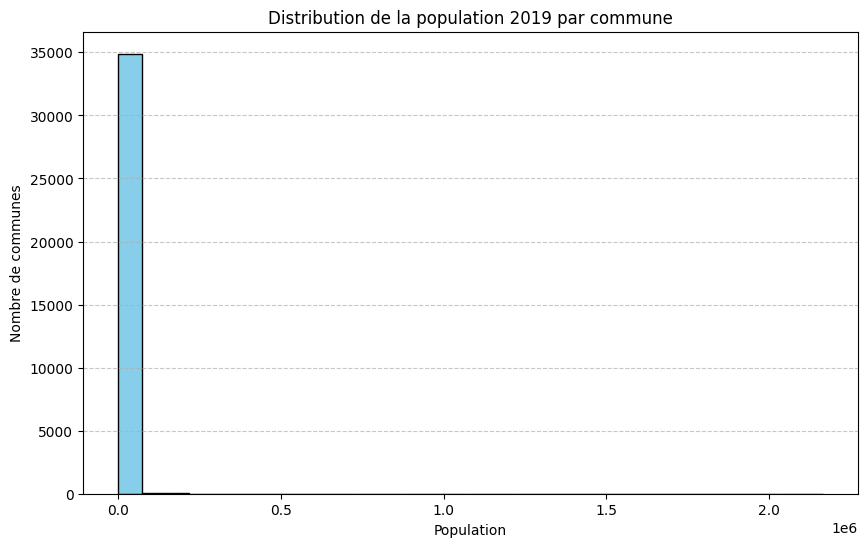

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Calculer le maximum de la série
max_population = evol_pop_insee["P19_POP"].max()

# Définir les limites des binômes pour couvrir la plage de données de manière significative
bin_limits = np.linspace(0, max_population, 31)  # nb binômes entre 0 et le logarithme du maximum

plt.figure(figsize=(10, 6))
plt.hist(evol_pop_insee["P19_POP"], bins=bin_limits, color='skyblue', edgecolor='black')
plt.title('Distribution de la population 2019 par commune')
plt.xlabel('Population')
plt.ylabel('Nombre de communes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Le problème ?

Comme nous avons des valeurs maximales qui écrasent le reste des valeurs, cela rend l'histogramme difficile à interpréter, on applique donc une transformation du logaritme (népérien) de la colonne "P19_POP" valable quand les valeurs ont une distribution normale (comme pour la population). Cela peut aider à atténuer l'effet des valeurs extrêmes et rendre la distribution plus visible.

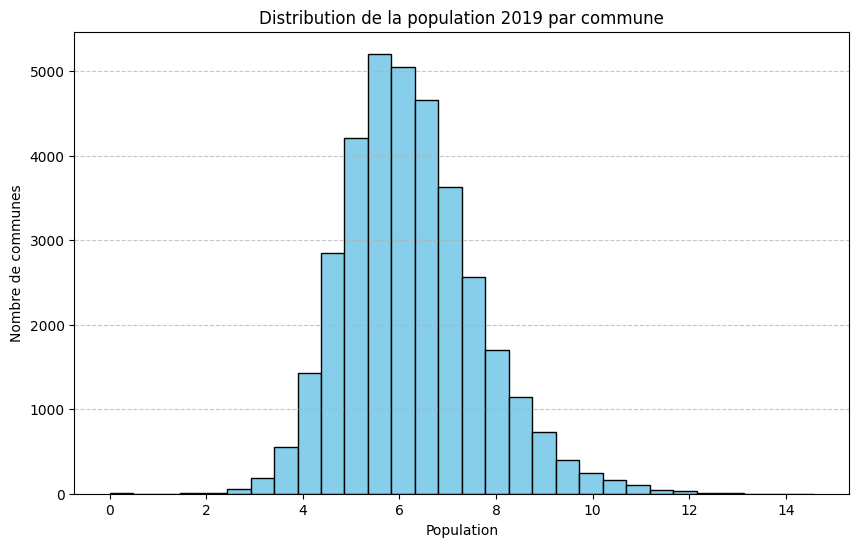

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Log-transformation de la colonne "P19_POP"
evol_pop_insee["P19_POP_log"] = np.log1p(evol_pop_insee["P19_POP"])

# Calculer le maximum de la série
max_population = evol_pop_insee["P19_POP"].max()

# Définir les limites des binômes pour couvrir la plage de données de manière significative
bin_limits = np.linspace(0, np.log1p(max_population), 31)  # nb binômes entre 0 et le logarithme du maximum

plt.figure(figsize=(10, 6))
plt.hist(evol_pop_insee["P19_POP_log"], bins=bin_limits, color='skyblue', edgecolor='black')
plt.title('Distribution de la population 2019 par commune')
plt.xlabel('Population')
plt.ylabel('Nombre de communes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



On peut encore améliorer ce graphique, notamment au niveau de l'axe des abscisses

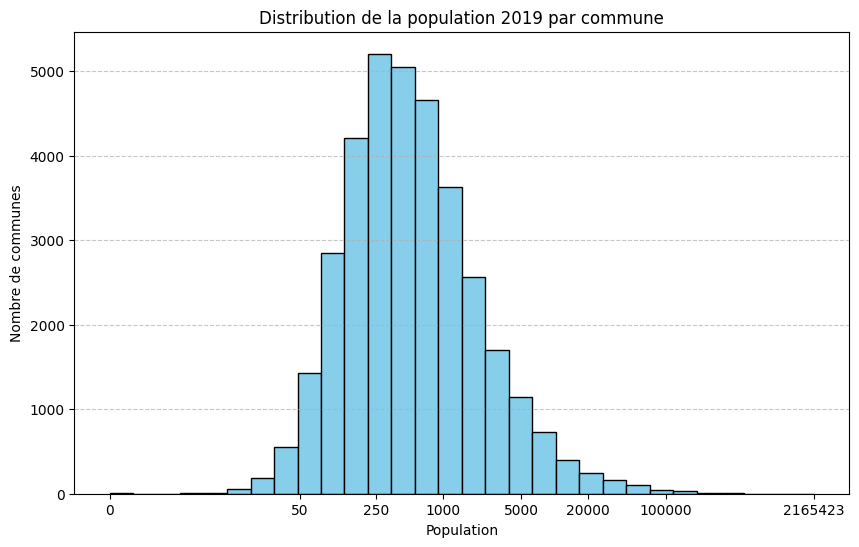

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Log-transformation de la colonne "P19_POP"
evol_pop_insee["P19_POP_log"] = np.log1p(evol_pop_insee["P19_POP"])

# Calculer le maximum de la série
max_population = evol_pop_insee["P19_POP"].max()

# Définir les limites des binômes pour couvrir la plage de données de manière significative
bin_limits = np.linspace(0, np.log1p(max_population), 31)  # nb binômes entre 0 et le logarithme du maximum

plt.figure(figsize=(10, 6))
plt.hist(evol_pop_insee["P19_POP_log"], bins=bin_limits, color='skyblue', edgecolor='black')
plt.title('Distribution de la population 2019 par commune')
plt.xlabel('Population')
plt.ylabel('Nombre de communes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Définir manuellement les valeurs pour les marques sur l'axe des abscisses
xticks_values = [0, 50, 250, 1000, 5000, 20000, 100000, max_population]  # Valeurs significatives
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(ticks=np.log1p(xticks_values), labels=xticks_values)  # Convertir en logarithme pour correspondre aux valeurs transformées
plt.savefig('dist_log_pop2019.jpg', format='jpeg')
plt.show()



Variable : **population en 2008**

In [ ]:
evol_pop_insee['P08_POP'].sample(10)

,P08_POP
CODGEO,
21608,120.0
88155,124.0
46114,410.0
50401,659.0
40133,4543.0
62804,345.0
60304,293.0
02831,368.0
50423,221.0


In [ ]:
evol_pop_insee['P08_POP'].describe()

,P08_POP
count,3.497400e+04
mean,1.929991e+03
std,1.536171e+04
min,0.000000e+00
25%,1.940000e+02
50%,4.380000e+02
75%,1.100000e+03
max,2.211297e+06


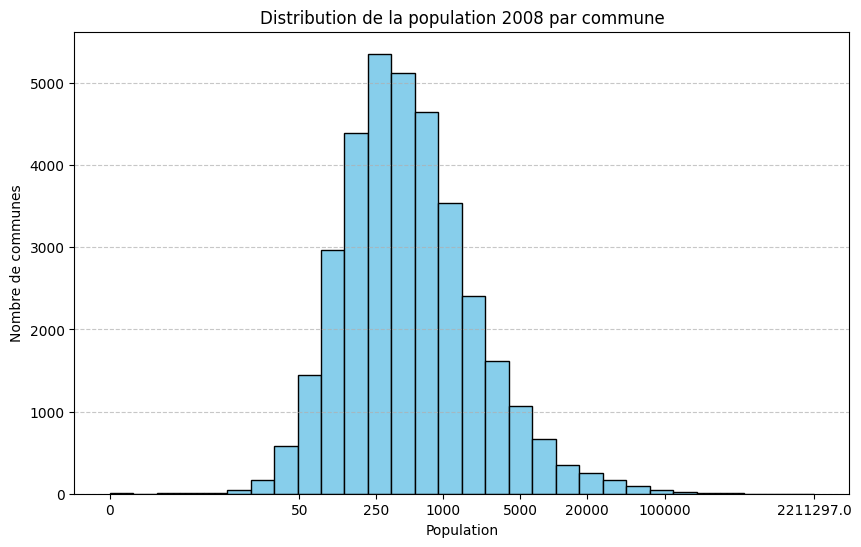

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Log-transformation de la colonne "P13_POP"
evol_pop_insee["P08_POP_log"] = np.log1p(evol_pop_insee["P08_POP"])

# Calculer le maximum de la série
max_population = evol_pop_insee["P08_POP"].max()

# Définir les limites des binômes pour couvrir la plage de données de manière significative
bin_limits = np.linspace(0, np.log1p(max_population), 31)  # nb binômes entre 0 et le logarithme du maximum

plt.figure(figsize=(10, 6))
plt.hist(evol_pop_insee["P08_POP_log"], bins=bin_limits, color='skyblue', edgecolor='black')
plt.title('Distribution de la population 2008 par commune')
plt.xlabel('Population')
plt.ylabel('Nombre de communes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Définir manuellement les valeurs pour les marques sur l'axe des abscisses
xticks_values = [0, 50, 250, 1000, 5000, 20000, 100000, max_population]  # Valeurs significatives
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(ticks=np.log1p(xticks_values), labels=xticks_values)  # Convertir en logarithme pour correspondre aux valeurs transformées
plt.savefig('dist_log_pop2008.jpg', format='jpeg')
plt.show()



En regardant de près des exemples..

In [ ]:
evol_pop_insee.loc['75056'][['P08_POP','P13_POP','P19_POP']] #Paris


,75056
P08_POP,2211297.0
P13_POP,2229621.0
P19_POP,2165423.0


La population de Paris a augmenté entre 2008 et 2013 d'environ 0.83%, et diminué entre 2013 et 2019 d'environ 2.88%.

In [ ]:
evol_pop_insee.loc['44043'][['P08_POP','P13_POP','P19_POP']] #Clisson

,44043
P08_POP,6739.0
P13_POP,6662.0
P19_POP,7435.0


 La population de Clisson a diminué entre 2008 et 2013 d'environ 1.14%, et ensuite augmenté entre 2013 et 2019 d'environ 11.60%.

### Exploration des données communales de France issues d'OpenStreetMap

In [ ]:
import requests, os
# Carte des communes de OSM
r = requests.get("https://osm13.openstreetmap.fr/~cquest/openfla/export/communes-20220101-shp.zip", verify=False)
if not os.path.exists(data_folder+"vecteurs/OSM"):
  os.makedirs(data_folder+"vecteurs/OSM")
open(data_folder+"vecteurs/OSM/communes-20220101-shp.zip", "wb").write(r.content)


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'osm13.openstreetmap.fr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


228507601

In [ ]:
import zipfile
with zipfile.ZipFile(data_folder+"vecteurs/OSM/communes-20220101-shp.zip","r") as zip_ref:
  zip_ref.extractall(data_folder+"vecteurs/OSM/")

In [ ]:
!pip install geopandas

In [ ]:
import geopandas
communes_fr = geopandas.read_file(data_folder+"vecteurs/OSM/communes-20220101.shp", encoding='utf-8')
communes_fr = communes_fr.set_index("insee")

Transformation en système de projection Lambert 93 (epgs 2154)

In [ ]:
communes_fr_lambert93 = communes_fr.to_crs({'init': 'epsg:2154'})

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
communes_fr_lambert93

,nom,wikipedia,surf_ha,geometry
insee,,,,
2B222,Pie-d'Orezza,fr:Pie-d'Orezza,573.0,"POLYGON ((1220731.039 6163639.566, 1220739.763..."
2B137,Lano,fr:Lano,824.0,"POLYGON ((1210814.726 6163416.773, 1210817.799..."
2B051,Cambia,fr:Cambia,833.0,"POLYGON ((1217316.939 6162253.42, 1217317.229 ..."
2B106,Érone,fr:Érone,393.0,"POLYGON ((1215139.391 6162187.448, 1215150.029..."
2B185,Oletta,fr:Oletta,2674.0,"POLYGON ((1215252.372 6194187.789, 1215257.02 ..."
...,...,...,...,...
80122,Bouquemaison,fr:Bouquemaison,724.0,"POLYGON ((651041.15 7015422.701, 651246.099 70..."
62795,Sibiville,fr:Sibiville,738.0,"POLYGON ((650755.948 7024794.794, 650773.074 7..."
62694,Rebreuve-sur-Canche,fr:Rebreuve-sur-Canche,842.0,"POLYGON ((651492.525 7016841.569, 651494.612 7..."


In [ ]:
communes_fr_lambert93.index
communes_fr_lambert93.index.name = 'CODGEO'

In [ ]:
communes_fr_lambert93_dept93 = communes_fr_lambert93[communes_fr_lambert93.index.str.match("^93")]
# Département de Seine Saint Denis :
#https://www.insee.fr/fr/metadonnees/cog/departement/DEP93-seine-saint-denis

In [ ]:
communes_fr_lambert93_dept93

,nom,wikipedia,surf_ha,geometry
CODGEO,,,,
93047,Montfermeil,fr:Montfermeil,544.0,"POLYGON ((666578.371 6866344.242, 666743.884 6..."
93033,Gournay-sur-Marne,fr:Gournay-sur-Marne,168.0,"POLYGON ((668022.91 6862556.052, 668034.026 68..."
93015,Coubron,fr:Coubron,419.0,"POLYGON ((667676.876 6869003.916, 667697.756 6..."
93074,Vaujours,fr:Vaujours,371.0,"POLYGON ((667521.63 6870678.995, 667841.692 68..."
93008,Bobigny,fr:Bobigny,678.0,"POLYGON ((656762.882 6868675.605, 656851.331 6..."
93006,Bagnolet,fr:Bagnolet,257.0,"POLYGON ((656976.5 6863840.464, 657041.433 686..."
93063,Romainville,fr:Romainville,343.0,"POLYGON ((657776.702 6865886.437, 657788.037 6..."
93045,Les Lilas,fr:Les Lilas,126.0,"POLYGON ((656789.376 6864428.171, 656860.597 6..."
93061,Le Pré-Saint-Gervais,fr:Le Pré-Saint-Gervais,70.0,"POLYGON ((655924.286 6865673.113, 656005.282 6..."


In [ ]:
len(communes_fr_lambert93_dept93)

40

<Axes: >

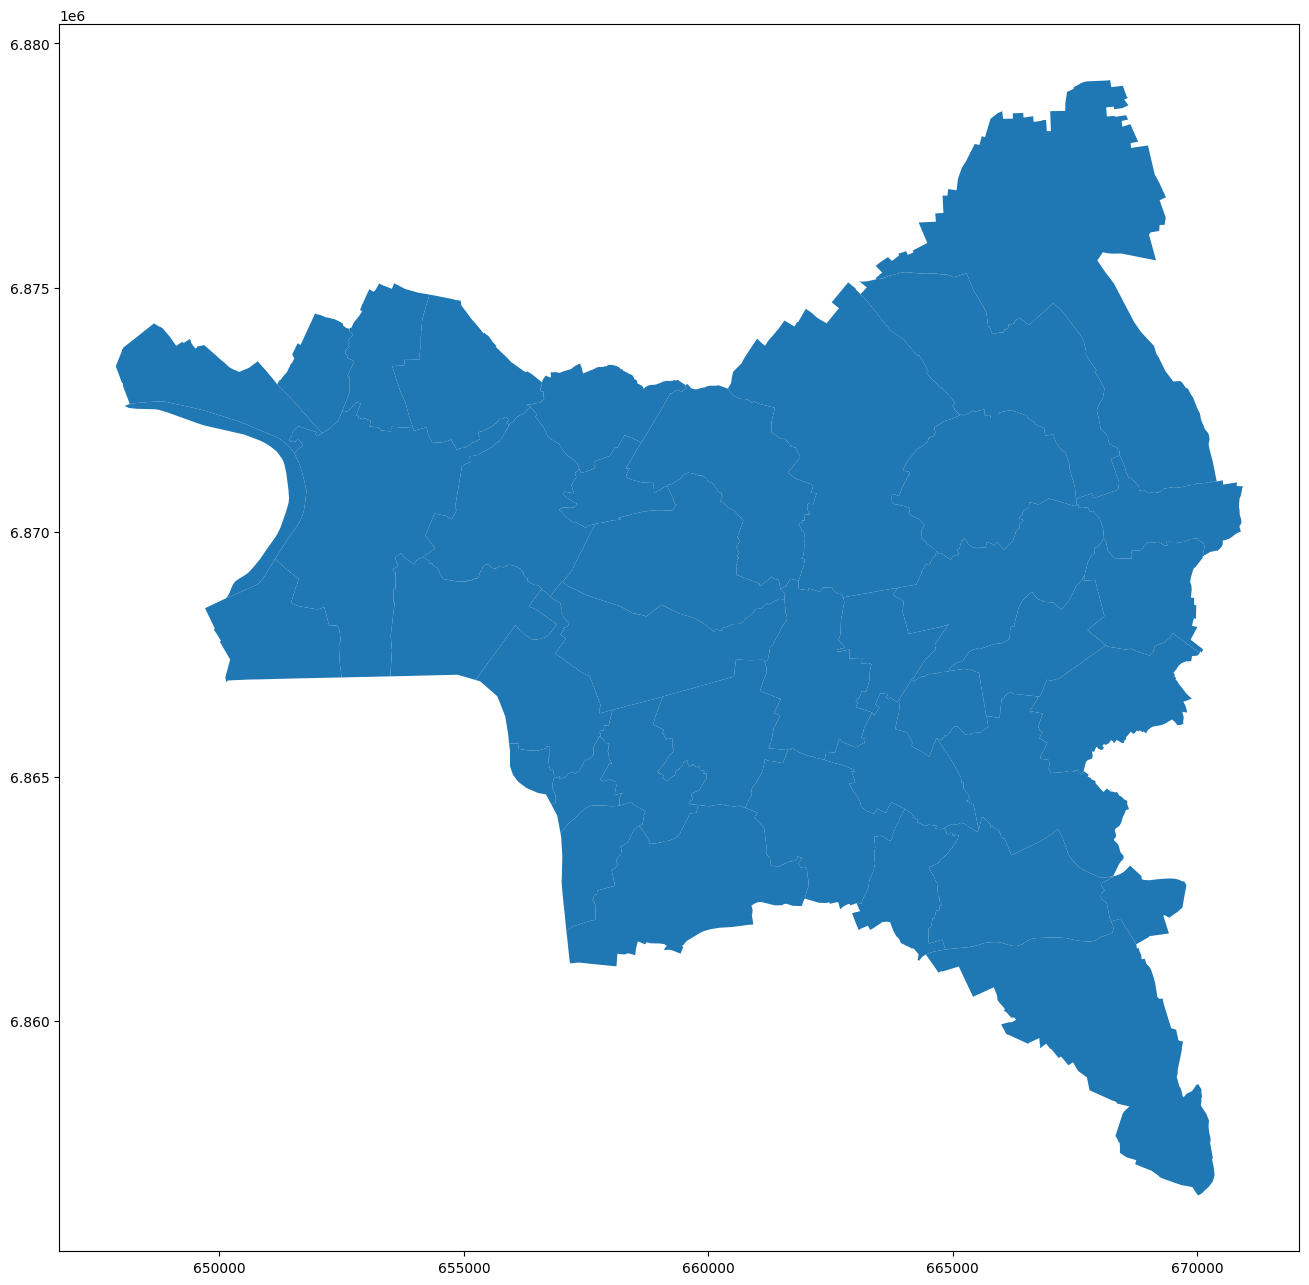

In [ ]:
communes_fr_lambert93_dept93["geometry"].plot(figsize=(16, 16))

In [ ]:
communes_fr_lambert93_dept93.surf_ha.describe()

,surf_ha
count,40.000000
mean,591.950000
std,428.683312
min,70.000000
25%,341.750000
50%,502.500000
75%,730.000000
max,2262.000000


<Figure size 800x800 with 0 Axes>

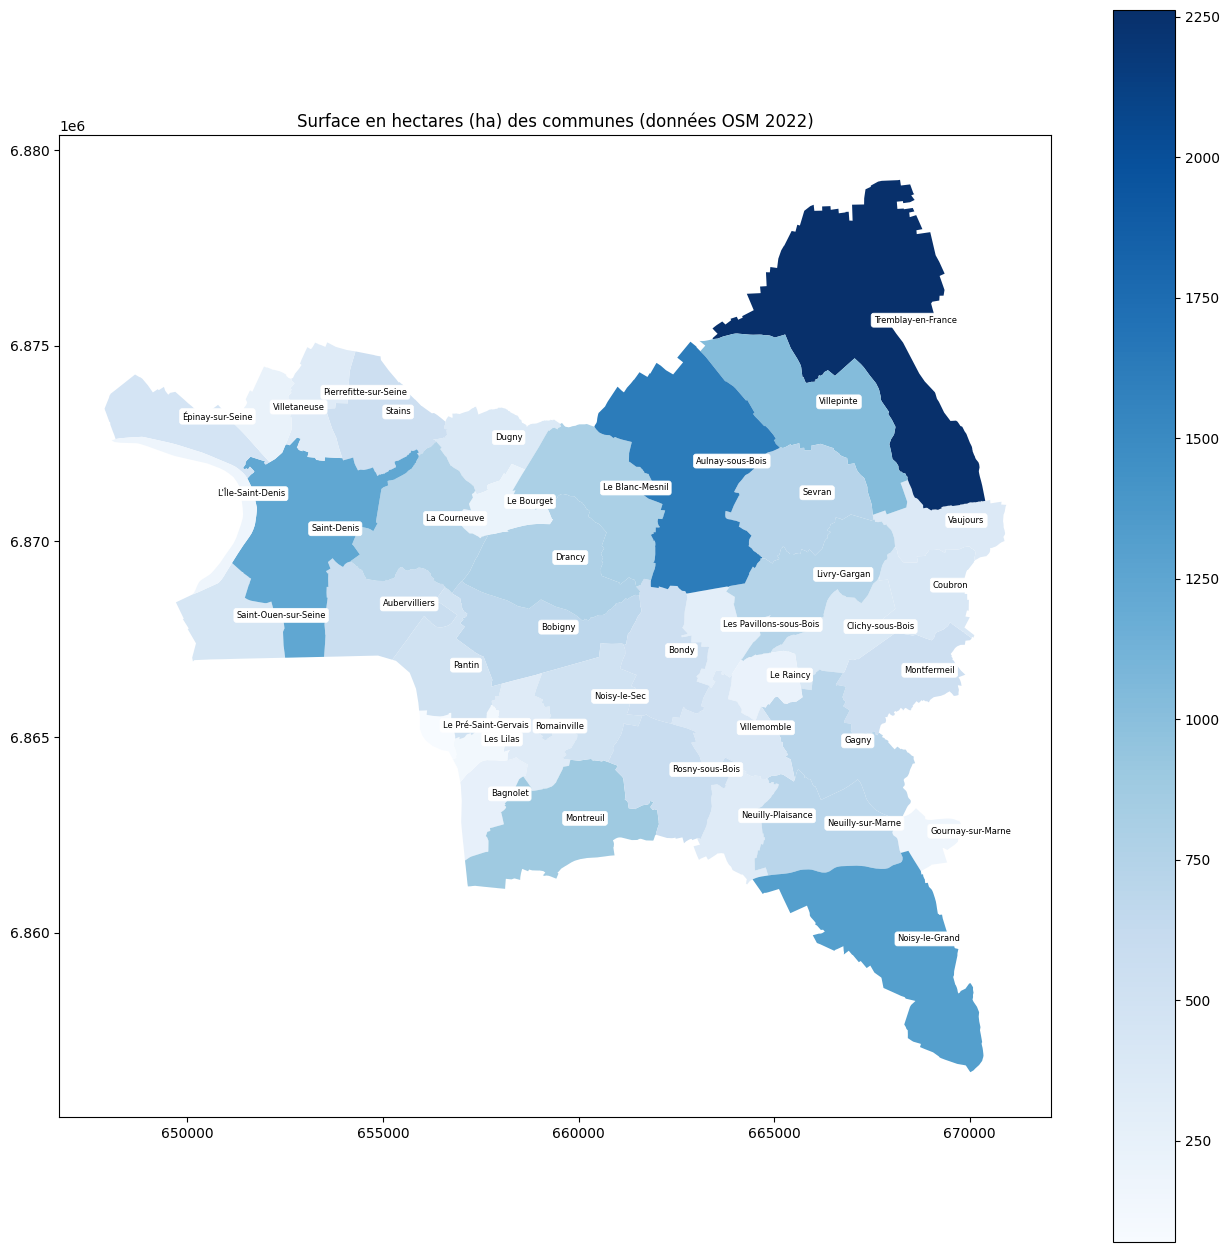

In [ ]:
plt.figure(figsize=(8, 8))
communes_fr_lambert93_dept93.plot("surf_ha", cmap="Blues", figsize=(16, 16), legend=True)
plt.title("Surface en hectares (ha) des communes (données OSM 2022)")

#Ajout des étiquettes pour chaque polygone
for x, y, label in zip(communes_fr_lambert93_dept93.geometry.centroid.x,
                       communes_fr_lambert93_dept93.geometry.centroid.y,
                       communes_fr_lambert93_dept93["nom"]):
    plt.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=6,
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", edgecolor="white", linewidth=0.5))

plt.show()

In [ ]:
#min
communes_fr_lambert93_dept93.loc[communes_fr_lambert93_dept93['surf_ha'] == 70]

,nom,wikipedia,surf_ha,geometry
CODGEO,,,,
93061,Le Pré-Saint-Gervais,fr:Le Pré-Saint-Gervais,70.0,"POLYGON ((655924.286 6865673.113, 656005.282 6..."


In [ ]:
#max
communes_fr_lambert93_dept93.loc[communes_fr_lambert93_dept93['surf_ha'] == 2262]

,nom,wikipedia,surf_ha,geometry
CODGEO,,,,
93073,Tremblay-en-France,fr:Tremblay-en-France,2262.0,"POLYGON ((663424.784 6875441.962, 663425.772 6..."


### Jointure des données de la population avec un référentiel géographique des communes de France (OSM)




Notions - opération de jointure du SQL :

https://phoenixnap.com/kb/wp-content/uploads/2021/04/join-types.png

*Illustration avec les données INSEE et les communes OSM*

**Jointure interne (inner)**

In [ ]:
communes_fr_lambert93

,nom,wikipedia,surf_ha,geometry
CODGEO,,,,
2B222,Pie-d'Orezza,fr:Pie-d'Orezza,573.0,"POLYGON ((1220731.039 6163639.566, 1220739.763..."
2B137,Lano,fr:Lano,824.0,"POLYGON ((1210814.726 6163416.773, 1210817.799..."
2B051,Cambia,fr:Cambia,833.0,"POLYGON ((1217316.939 6162253.42, 1217317.229 ..."
2B106,Érone,fr:Érone,393.0,"POLYGON ((1215139.391 6162187.448, 1215150.029..."
2B185,Oletta,fr:Oletta,2674.0,"POLYGON ((1215252.372 6194187.789, 1215257.02 ..."
...,...,...,...,...
80122,Bouquemaison,fr:Bouquemaison,724.0,"POLYGON ((651041.15 7015422.701, 651246.099 70..."
62795,Sibiville,fr:Sibiville,738.0,"POLYGON ((650755.948 7024794.794, 650773.074 7..."
62694,Rebreuve-sur-Canche,fr:Rebreuve-sur-Canche,842.0,"POLYGON ((651492.525 7016841.569, 651494.612 7..."


In [ ]:
communes_fr_lambert93.loc['93051']

,93051
nom,Noisy-le-Grand
wikipedia,fr:Noisy-le-Grand
surf_ha,1320.0
geometry,"POLYGON ((664448.0917639557 6861361.057873306,..."


In [ ]:
evol_pop_insee.loc['93051']

,93051
P19_POP,67871.000000
P19_POP0014,14317.963830
P19_POP1529,14099.560918
P19_POP3044,14874.847275
P19_POP4559,12532.323664
...,...
C08_POP55P_CS6,691.283907
C08_POP55P_CS7,7718.752647
C08_POP55P_CS8,1181.128892
P19_POP_log,11.125379


In [ ]:
join_evol_pop_insee_osm_inner = pd.merge(communes_fr_lambert93, evol_pop_insee, on='CODGEO', how='inner')

In [ ]:
join_evol_pop_insee_osm_inner

,nom,wikipedia,surf_ha,geometry,P19_POP,P19_POP0014,P19_POP1529,P19_POP3044,P19_POP4559,P19_POP6074,...,C08_POP55P_CS1,C08_POP55P_CS2,C08_POP55P_CS3,C08_POP55P_CS4,C08_POP55P_CS5,C08_POP55P_CS6,C08_POP55P_CS7,C08_POP55P_CS8,P19_POP_log,P08_POP_log
CODGEO,,,,,,,,,,,,,,,,,,,,,
2B222,Pie-d'Orezza,fr:Pie-d'Orezza,573.0,"POLYGON ((1220731.039 6163639.566, 1220739.763...",38,1.000000,4.000000,2.000000,13.000000,12.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,3.000000,3.663562,3.583519
2B137,Lano,fr:Lano,824.0,"POLYGON ((1210814.726 6163416.773, 1210817.799...",23,1.000000,1.000000,2.000000,3.000000,9.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000,4.000000,3.178054,3.135494
2B051,Cambia,fr:Cambia,833.0,"POLYGON ((1217316.939 6162253.42, 1217317.229 ...",73,3.945946,9.864865,7.891892,10.851351,20.716216,...,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,22.000000,3.000000,4.304065,4.317488
2B106,Érone,fr:Érone,393.0,"POLYGON ((1215139.391 6162187.448, 1215150.029...",12,2.000000,2.000000,3.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,2.564949,1.945910
2B185,Oletta,fr:Oletta,2674.0,"POLYGON ((1215252.372 6194187.789, 1215257.02 ...",1781,244.000000,212.000000,306.000000,388.000000,384.000000,...,3.875536,11.626609,19.377682,17.439914,21.315450,9.688841,380.314245,71.672843,7.485492,7.190676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80122,Bouquemaison,fr:Bouquemaison,724.0,"POLYGON ((651041.15 7015422.701, 651246.099 70...",488,89.899180,68.124405,92.563408,96.015384,90.603381,...,7.885481,3.942740,0.000000,0.000000,0.000000,7.885481,118.282209,7.885481,6.192362,6.180017
62795,Sibiville,fr:Sibiville,738.0,"POLYGON ((650755.948 7024794.794, 650773.074 7...",112,26.234234,13.117117,28.252252,16.144144,21.189189,...,0.000000,0.000000,0.000000,0.000000,3.869565,0.000000,34.826087,0.000000,4.727388,4.499810
62694,Rebreuve-sur-Canche,fr:Rebreuve-sur-Canche,842.0,"POLYGON ((651492.525 7016841.569, 651494.612 7...",188,31.000000,23.000000,33.000000,38.000000,41.000000,...,0.000000,0.000000,0.000000,0.000000,3.945701,0.000000,59.185520,7.891403,5.241747,5.389072


Comment observer les lignes sans correspondances entre les deux tables ?

**jointure externe à guache (left join)**

A gauche : les communes

A droite : la population

In [ ]:
join_evol_pop_insee_osm_left = pd.merge(communes_fr_lambert93, evol_pop_insee, on='CODGEO', how='left')

In [ ]:
join_evol_pop_insee_osm_left

,nom,wikipedia,surf_ha,geometry,P19_POP,P19_POP0014,P19_POP1529,P19_POP3044,P19_POP4559,P19_POP6074,...,C08_POP55P_CS1,C08_POP55P_CS2,C08_POP55P_CS3,C08_POP55P_CS4,C08_POP55P_CS5,C08_POP55P_CS6,C08_POP55P_CS7,C08_POP55P_CS8,P19_POP_log,P08_POP_log
CODGEO,,,,,,,,,,,,,,,,,,,,,
2B222,Pie-d'Orezza,fr:Pie-d'Orezza,573.0,"POLYGON ((1220731.039 6163639.566, 1220739.763...",38.0,1.000000,4.000000,2.000000,13.000000,12.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,3.000000,3.663562,3.583519
2B137,Lano,fr:Lano,824.0,"POLYGON ((1210814.726 6163416.773, 1210817.799...",23.0,1.000000,1.000000,2.000000,3.000000,9.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000,4.000000,3.178054,3.135494
2B051,Cambia,fr:Cambia,833.0,"POLYGON ((1217316.939 6162253.42, 1217317.229 ...",73.0,3.945946,9.864865,7.891892,10.851351,20.716216,...,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,22.000000,3.000000,4.304065,4.317488
2B106,Érone,fr:Érone,393.0,"POLYGON ((1215139.391 6162187.448, 1215150.029...",12.0,2.000000,2.000000,3.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,2.564949,1.945910
2B185,Oletta,fr:Oletta,2674.0,"POLYGON ((1215252.372 6194187.789, 1215257.02 ...",1781.0,244.000000,212.000000,306.000000,388.000000,384.000000,...,3.875536,11.626609,19.377682,17.439914,21.315450,9.688841,380.314245,71.672843,7.485492,7.190676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80122,Bouquemaison,fr:Bouquemaison,724.0,"POLYGON ((651041.15 7015422.701, 651246.099 70...",488.0,89.899180,68.124405,92.563408,96.015384,90.603381,...,7.885481,3.942740,0.000000,0.000000,0.000000,7.885481,118.282209,7.885481,6.192362,6.180017
62795,Sibiville,fr:Sibiville,738.0,"POLYGON ((650755.948 7024794.794, 650773.074 7...",112.0,26.234234,13.117117,28.252252,16.144144,21.189189,...,0.000000,0.000000,0.000000,0.000000,3.869565,0.000000,34.826087,0.000000,4.727388,4.499810
62694,Rebreuve-sur-Canche,fr:Rebreuve-sur-Canche,842.0,"POLYGON ((651492.525 7016841.569, 651494.612 7...",188.0,31.000000,23.000000,33.000000,38.000000,41.000000,...,0.000000,0.000000,0.000000,0.000000,3.945701,0.000000,59.185520,7.891403,5.241747,5.389072


In [ ]:
# Compter le nombre de valeurs nulles du côté gauche
rows_with_all_nan_in_column = join_evol_pop_insee_osm_left[join_evol_pop_insee_osm_left['P19_POP'].isna()]

In [ ]:
rows_with_all_nan_in_column

,nom,wikipedia,surf_ha,geometry,P19_POP,P19_POP0014,P19_POP1529,P19_POP3044,P19_POP4559,P19_POP6074,...,C08_POP55P_CS1,C08_POP55P_CS2,C08_POP55P_CS3,C08_POP55P_CS4,C08_POP55P_CS5,C08_POP55P_CS6,C08_POP55P_CS7,C08_POP55P_CS8,P19_POP_log,P08_POP_log
CODGEO,,,,,,,,,,,,,,,,,,,,,
97610,Koungou,fr:Koungou,2799.0,"MULTIPOLYGON (((7728073.075 763139.378, 772807...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97607,Dembéni,fr:Dembeni (Mayotte),3810.0,"MULTIPOLYGON (((7736563.221 746162.18, 7736649...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97611,Mamoudzou,fr:Mamoudzou,4220.0,"MULTIPOLYGON (((7735921.54 751984.541, 7736218...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97608,Dzaoudzi,fr:Dzaoudzi,658.0,"MULTIPOLYGON (((7747600.857 765606.559, 774759...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97603,Bandrélé,fr:Bandrele,3571.0,"MULTIPOLYGON (((7748830.903 726118.444, 775084...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97615,Pamandzi,fr:Pamandzi,442.0,"MULTIPOLYGON (((7752814.917 764232.01, 7752830...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97612,Mtsamboro,fr:Mtsamboro,1637.0,"MULTIPOLYGON (((7701196.061 764637.584, 770119...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97613,M'Tsangamouji,fr:M'Tsangamouji,2157.0,"MULTIPOLYGON (((7714377.852 750816.026, 771437...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97602,Bandraboua,fr:Bandraboua,3165.0,"MULTIPOLYGON (((7716016.477 763706.824, 771601...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**jointure externe à droite (right join)**

A gauche : les communes

A droite : la population

In [ ]:
join_evol_pop_insee_osm_right = pd.merge(communes_fr_lambert93, evol_pop_insee, on='CODGEO', how='right')

In [ ]:
# Compter le nombre de valeurs nulles du côté droite
rows_with_all_nan_in_column = join_evol_pop_insee_osm_right[join_evol_pop_insee_osm_right['P19_POP'].isna()]

In [ ]:
rows_with_all_nan_in_column

,nom,wikipedia,surf_ha,geometry,P19_POP,P19_POP0014,P19_POP1529,P19_POP3044,P19_POP4559,P19_POP6074,...,C08_POP55P_CS1,C08_POP55P_CS2,C08_POP55P_CS3,C08_POP55P_CS4,C08_POP55P_CS5,C08_POP55P_CS6,C08_POP55P_CS7,C08_POP55P_CS8,P19_POP_log,P08_POP_log
CODGEO,,,,,,,,,,,,,,,,,,,,,


### Sélection des données communales du 93

In [ ]:
communes_fr_lambert93_dept93

,nom,wikipedia,surf_ha,geometry
CODGEO,,,,
93047,Montfermeil,fr:Montfermeil,544.0,"POLYGON ((666578.371 6866344.242, 666743.884 6..."
93033,Gournay-sur-Marne,fr:Gournay-sur-Marne,168.0,"POLYGON ((668022.91 6862556.052, 668034.026 68..."
93015,Coubron,fr:Coubron,419.0,"POLYGON ((667676.876 6869003.916, 667697.756 6..."
93074,Vaujours,fr:Vaujours,371.0,"POLYGON ((667521.63 6870678.995, 667841.692 68..."
93008,Bobigny,fr:Bobigny,678.0,"POLYGON ((656762.882 6868675.605, 656851.331 6..."
93006,Bagnolet,fr:Bagnolet,257.0,"POLYGON ((656976.5 6863840.464, 657041.433 686..."
93063,Romainville,fr:Romainville,343.0,"POLYGON ((657776.702 6865886.437, 657788.037 6..."
93045,Les Lilas,fr:Les Lilas,126.0,"POLYGON ((656789.376 6864428.171, 656860.597 6..."
93061,Le Pré-Saint-Gervais,fr:Le Pré-Saint-Gervais,70.0,"POLYGON ((655924.286 6865673.113, 656005.282 6..."


**Jointure interne (inner)**

In [ ]:
join_93_evol_pop = pd.merge(communes_fr_lambert93_dept93, evol_pop_insee, on='CODGEO', how='inner')

In [ ]:
join_93_evol_pop

,nom,wikipedia,surf_ha,geometry,P19_POP,P19_POP0014,P19_POP1529,P19_POP3044,P19_POP4559,P19_POP6074,...,C08_POP55P_CS1,C08_POP55P_CS2,C08_POP55P_CS3,C08_POP55P_CS4,C08_POP55P_CS5,C08_POP55P_CS6,C08_POP55P_CS7,C08_POP55P_CS8,P19_POP_log,P08_POP_log
CODGEO,,,,,,,,,,,,,,,,,,,,,
93047,Montfermeil,fr:Montfermeil,544.0,"POLYGON ((666578.371 6866344.242, 666743.884 6...",27928,6629.523098,5488.191574,5453.774562,5388.783331,3261.617260,...,0.000000,113.608165,252.031721,300.848403,293.203842,303.735620,3833.693798,723.161581,10.237421,10.104713
93033,Gournay-sur-Marne,fr:Gournay-sur-Marne,168.0,"POLYGON ((668022.91 6862556.052, 668034.026 68...",6844,1316.382639,1099.758973,1363.033886,1414.476474,1164.397533,...,0.000000,44.000000,184.000000,112.000000,80.000000,48.000000,1320.000000,104.000000,8.831274,8.737132
93015,Coubron,fr:Coubron,419.0,"POLYGON ((667676.876 6869003.916, 667697.756 6...",4921,1055.504683,717.075173,997.825726,1003.324652,769.499763,...,0.000000,23.908213,99.617556,119.541067,51.801129,39.847022,804.909851,83.708772,8.501470,8.450412
93074,Vaujours,fr:Vaujours,371.0,"POLYGON ((667521.63 6870678.995, 667841.692 68...",7181,1562.068117,1467.362385,1513.795150,1396.626214,812.837884,...,0.000000,20.086719,44.397707,96.798658,92.703910,48.377708,911.990753,141.023110,8.879333,8.712102
93008,Bobigny,fr:Bobigny,678.0,"POLYGON ((656762.882 6868675.605, 656851.331 6...",54363,13418.263918,11281.461271,11711.016768,9767.986128,5900.348134,...,0.000000,153.090991,211.516274,366.387926,814.326425,853.682455,5178.426597,933.562766,10.903457,10.773253
93006,Bagnolet,fr:Bagnolet,257.0,"POLYGON ((656976.5 6863840.464, 657041.433 686...",36060,6999.286182,7107.429455,8319.144053,7108.229329,4503.399309,...,0.000000,202.661509,320.314063,341.933448,593.274347,445.860434,4735.227135,669.002015,10.492967,10.432968
93063,Romainville,fr:Romainville,343.0,"POLYGON ((657776.702 6865886.437, 657788.037 6...",30087,6977.820071,5616.790585,6726.571615,5821.613268,3362.633785,...,0.000000,156.841031,227.414637,250.257211,467.379649,398.294903,3791.089050,479.180187,10.311882,10.151207
93045,Les Lilas,fr:Les Lilas,126.0,"POLYGON ((656789.376 6864428.171, 656860.597 6...",23447,4238.407445,4174.620478,5621.781498,4345.623696,3270.018388,...,0.000000,148.052584,427.656189,424.919061,383.898097,166.225663,3926.125894,351.318164,10.062540,10.005954
93061,Le Pré-Saint-Gervais,fr:Le Pré-Saint-Gervais,70.0,"POLYGON ((655924.286 6865673.113, 656005.282 6...",17351,3093.778165,3221.206288,4148.927988,3514.813950,2368.189893,...,7.527936,86.047976,143.188283,170.318000,294.930041,229.200737,2023.026335,338.720772,9.761463,9.775029


### Cartographie de la population en 2008, 2013, 2019 par commune à partir des catégories INSEE

Selon l'INSEE (Institut national de la statistique et des études économiques), la classification de la population des communes, des villes et des grandes villes est la suivante :

* Commune de moins de 2 000 habitants : commune rurale
* Commune de 2 000 à 9 999 habitants : petite ville
* Commune de 10 000 à 49 999 habitants : ville moyenne
* Commune de 50 000 à 199 999 habitants : grande ville
* Commune de 200 000 habitants ou plus : ville très grande ou métropole.

In [ ]:
import numpy as np

def correspondances_categories(column, column2, df):
  conditions_pop_label = [
    (df[column] < 2000),
    (df[column] >= 2000) & (df[column] < 10000),
    (df[column] >= 10000) & (df[column] <= 50000),
    (df[column] >= 50000) & (df[column] <= 200000),
    (df[column] > 200000)
  ]
  # create a list of the values we want to assign for each condition
  #values_pop_label = [1, 2, 3, 4, 5]
  values_pop_label = ['rurale', 'petite', 'moyenne', 'grande', 'metropole']
  # create a new column and use np.select to assign values to it using our lists as arguments
  df[column2] = np.select(conditions_pop_label, values_pop_label)
  return df

In [ ]:
correspondances_categories('P08_POP', 'label_class_pop2008', join_93_evol_pop)
correspondances_categories('P13_POP', 'label_class_pop2013', join_93_evol_pop)
correspondances_categories('P19_POP', 'label_class_pop2019', join_93_evol_pop)

,nom,wikipedia,surf_ha,geometry,P19_POP,P19_POP0014,P19_POP1529,P19_POP3044,P19_POP4559,P19_POP6074,...,C08_POP55P_CS4,C08_POP55P_CS5,C08_POP55P_CS6,C08_POP55P_CS7,C08_POP55P_CS8,P19_POP_log,P08_POP_log,label_class_pop2008,label_class_pop2013,label_class_pop2019
CODGEO,,,,,,,,,,,,,,,,,,,,,
93047,Montfermeil,fr:Montfermeil,544.0,"POLYGON ((666578.371 6866344.242, 666743.884 6...",27928,6629.523098,5488.191574,5453.774562,5388.783331,3261.617260,...,300.848403,293.203842,303.735620,3833.693798,723.161581,10.237421,10.104713,moyenne,moyenne,moyenne
93033,Gournay-sur-Marne,fr:Gournay-sur-Marne,168.0,"POLYGON ((668022.91 6862556.052, 668034.026 68...",6844,1316.382639,1099.758973,1363.033886,1414.476474,1164.397533,...,112.000000,80.000000,48.000000,1320.000000,104.000000,8.831274,8.737132,petite,petite,petite
93015,Coubron,fr:Coubron,419.0,"POLYGON ((667676.876 6869003.916, 667697.756 6...",4921,1055.504683,717.075173,997.825726,1003.324652,769.499763,...,119.541067,51.801129,39.847022,804.909851,83.708772,8.501470,8.450412,petite,petite,petite
93074,Vaujours,fr:Vaujours,371.0,"POLYGON ((667521.63 6870678.995, 667841.692 68...",7181,1562.068117,1467.362385,1513.795150,1396.626214,812.837884,...,96.798658,92.703910,48.377708,911.990753,141.023110,8.879333,8.712102,petite,petite,petite
93008,Bobigny,fr:Bobigny,678.0,"POLYGON ((656762.882 6868675.605, 656851.331 6...",54363,13418.263918,11281.461271,11711.016768,9767.986128,5900.348134,...,366.387926,814.326425,853.682455,5178.426597,933.562766,10.903457,10.773253,moyenne,moyenne,grande
93006,Bagnolet,fr:Bagnolet,257.0,"POLYGON ((656976.5 6863840.464, 657041.433 686...",36060,6999.286182,7107.429455,8319.144053,7108.229329,4503.399309,...,341.933448,593.274347,445.860434,4735.227135,669.002015,10.492967,10.432968,moyenne,moyenne,moyenne
93063,Romainville,fr:Romainville,343.0,"POLYGON ((657776.702 6865886.437, 657788.037 6...",30087,6977.820071,5616.790585,6726.571615,5821.613268,3362.633785,...,250.257211,467.379649,398.294903,3791.089050,479.180187,10.311882,10.151207,moyenne,moyenne,moyenne
93045,Les Lilas,fr:Les Lilas,126.0,"POLYGON ((656789.376 6864428.171, 656860.597 6...",23447,4238.407445,4174.620478,5621.781498,4345.623696,3270.018388,...,424.919061,383.898097,166.225663,3926.125894,351.318164,10.062540,10.005954,moyenne,moyenne,moyenne
93061,Le Pré-Saint-Gervais,fr:Le Pré-Saint-Gervais,70.0,"POLYGON ((655924.286 6865673.113, 656005.282 6...",17351,3093.778165,3221.206288,4148.927988,3514.813950,2368.189893,...,170.318000,294.930041,229.200737,2023.026335,338.720772,9.761463,9.775029,moyenne,moyenne,moyenne


Text(0.5, 1.0, 'Taille de la population en 2019')

<Figure size 800x800 with 0 Axes>

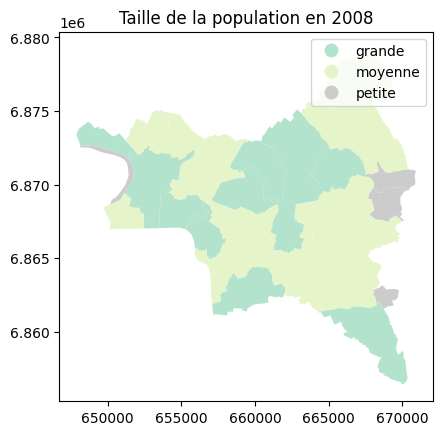

<Figure size 800x800 with 0 Axes>

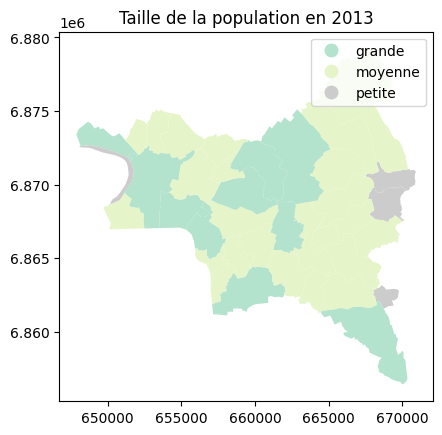

<Figure size 800x800 with 0 Axes>

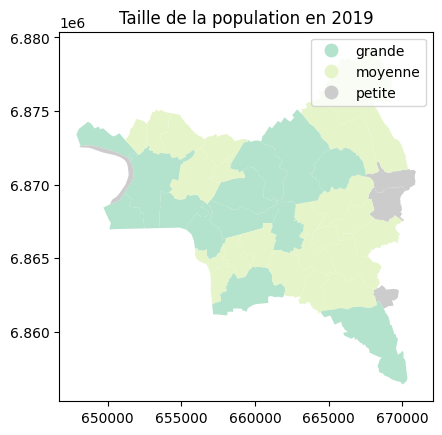

In [ ]:
import matplotlib.pyplot as plt

# Première figure
plt.figure(figsize=(8, 8))
join_93_evol_pop.plot("label_class_pop2008", cmap="Pastel2", legend=True, categorical=True)
plt.title("Taille de la population en 2008")

# Deuxième figure
plt.figure(figsize=(8, 8))
join_93_evol_pop.plot("label_class_pop2013", cmap="Pastel2", legend=True, categorical=True)
plt.title("Taille de la population en 2013")

# Troisième figure
plt.figure(figsize=(8, 8))
join_93_evol_pop.plot("label_class_pop2019", cmap="Pastel2", legend=True, categorical=True)
plt.title("Taille de la population en 2019")


In [ ]:
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
join_93_evol_pop.explore(
     column="label_class_pop2019", # make choropleth based on "BoroName" column
     tooltip="nom", # show "BoroName" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     tiles="CartoDB positron", # use "CartoDB positron" tiles
     cmap="Pastel1", # use "Set1" matplotlib colormap
     style_kwds=dict(color="grey"),
     legend_kwds=dict(caption="Taille de la population (2019)"),
     categorical=True
    )


Comment vérifier quelles communes ont changé de taille entre les années ?

In [ ]:
def compare_columns(df, col1, col2, col_name):
  if col1 not in df.columns:
    raise ValueError(f"La colonne {col1} n'existe pas dans le dataframe.")
  if col2 not in df.columns:
    raise ValueError(f"La colonne {col2} n'existe pas dans le dataframe.")

  changed = df[col1] != df[col2]
  diff = df[changed][[col_name, col1, col2]]
  return diff

In [ ]:
compare_columns(join_93_evol_pop, 'label_class_pop2008', 'label_class_pop2013', 'nom')

,nom,label_class_pop2008,label_class_pop2013
CODGEO,,,
93071,Sevran,grande,moyenne


In [ ]:
compare_columns(join_93_evol_pop, 'label_class_pop2013', 'label_class_pop2019', 'nom')

,nom,label_class_pop2013,label_class_pop2019
CODGEO,,,
93008,Bobigny,moyenne,grande
93071,Sevran,moyenne,grande
93070,Saint-Ouen-sur-Seine,moyenne,grande


In [ ]:
compare_columns(join_93_evol_pop, 'label_class_pop2008', 'label_class_pop2019', 'nom')

,nom,label_class_pop2008,label_class_pop2019
CODGEO,,,
93008,Bobigny,moyenne,grande
93070,Saint-Ouen-sur-Seine,moyenne,grande


In [ ]:
join_93_evol_pop[join_93_evol_pop.index == "93051"][['P08_POP','P13_POP','P19_POP']] #93051: Noisy-le-Grand

,P08_POP,P13_POP,P19_POP
CODGEO,,,
93051,63106.0,62834.0,67871


### Cartographie du différentiel de population entre les différentes années

In [ ]:
join_93_evol_pop['diff_2013_2008'] = join_93_evol_pop['P13_POP'] - join_93_evol_pop['P08_POP']
join_93_evol_pop['diff_2019_2013'] = join_93_evol_pop['P19_POP'] - join_93_evol_pop['P13_POP']
join_93_evol_pop['diff_2019_2008'] = join_93_evol_pop['P19_POP'] - join_93_evol_pop['P08_POP']

Différentiel négatif -> la population a diminué

Différentiel positif -> la population a augmenté

In [ ]:
join_93_evol_pop['diff_2013_2008']

,diff_2013_2008
CODGEO,
93047,1488.0
93033,434.0
93015,37.0
93074,753.0
93008,2076.0
93006,2024.0
93063,36.0
93045,662.0
93061,320.0


In [ ]:
join_93_evol_pop['diff_2013_2008'].describe()

,diff_2013_2008
count,40.000000
mean,1150.400000
std,1370.308702
min,-1305.000000
25%,36.750000
50%,965.000000
75%,2029.750000
max,5601.000000


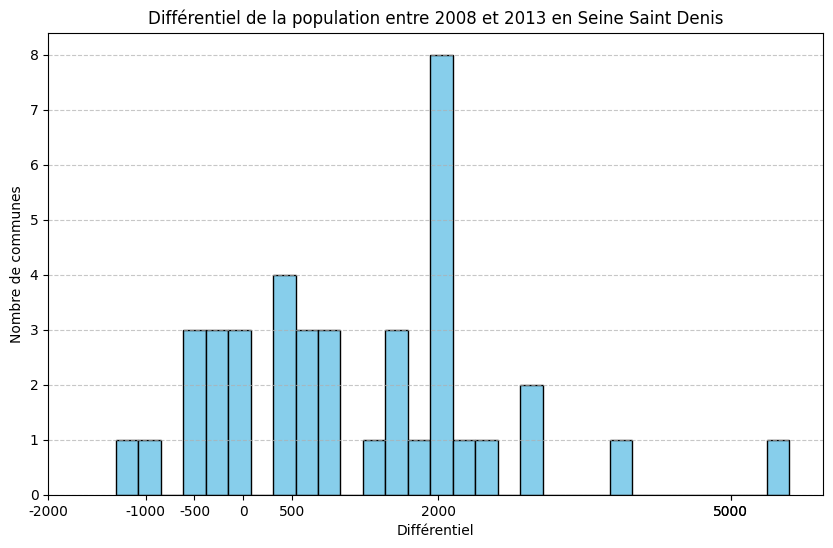

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Calculer le maximum de la série
max_diff = join_93_evol_pop["diff_2013_2008"].max()
min_diff = join_93_evol_pop["diff_2013_2008"].min()

# Définir les limites des binômes pour couvrir la plage de données de manière significative
bin_limits = np.linspace(min_diff, max_diff, 31)  # nb binômes

plt.figure(figsize=(10, 6))
plt.hist(join_93_evol_pop["diff_2013_2008"], bins=bin_limits, color='skyblue', edgecolor='black')
plt.title('Différentiel de la population entre 2008 et 2013 en Seine Saint Denis')
plt.xlabel('Différentiel')
plt.ylabel('Nombre de communes')
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Définir manuellement les valeurs pour les marques sur l'axe des abscisses (c'est mieux pour comparer)
xticks_values = [-2000, -1000, -500, 0, 500, 5000, 2000, 5000]  # Valeurs significatives
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(ticks=xticks_values, labels=xticks_values)
plt.savefig('dist_diff_pop2013_2008.jpg', format='jpeg')
plt.show()


In [ ]:
join_93_evol_pop['diff_2019_2013'].describe()

,diff_2019_2013
count,40.000000
mean,2310.525000
std,2487.951459
min,-1943.000000
25%,377.000000
50%,1883.500000
75%,3665.500000
max,11496.000000


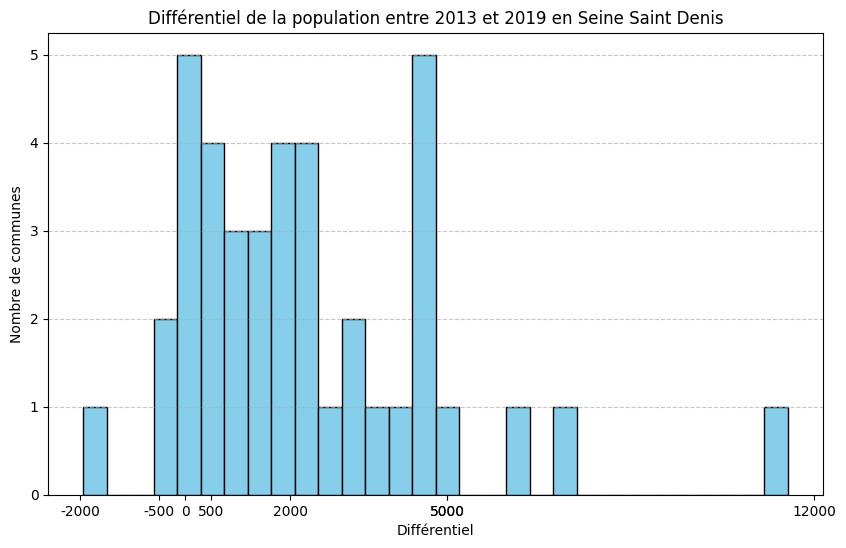

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Calculer le maximum de la série
max_diff = join_93_evol_pop["diff_2019_2013"].max()
min_diff = join_93_evol_pop["diff_2019_2013"].min()

# Définir les limites des binômes pour couvrir la plage de données de manière significative
bin_limits = np.linspace(min_diff, max_diff, 31)  # nb binômes

plt.figure(figsize=(10, 6))
plt.hist(join_93_evol_pop["diff_2019_2013"], bins=bin_limits, color='skyblue', edgecolor='black')
plt.title('Différentiel de la population entre 2013 et 2019 en Seine Saint Denis')
plt.xlabel('Différentiel')
plt.ylabel('Nombre de communes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Définir manuellement les valeurs pour les marques sur l'axe des abscisses (c'est mieux pour comparer)
xticks_values = [-2000, -500, 0, 500, 5000, 2000, 5000, 12000]  # Valeurs significatives
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(ticks=xticks_values, labels=xticks_values)
plt.savefig('dist_diff_pop2019_2013.jpg', format='jpeg')
plt.show()


In [ ]:
join_93_evol_pop.explore(
     column="diff_2013_2008", # make choropleth based on "BoroName" column
     tooltip="nom", # show "BoroName" value in tooltip (on hover)
     popup=True, # show all values in popup (on click)
     tiles="CartoDB positron", # use "CartoDB positron" tiles
     cmap="plasma", # use "Set1" matplotlib colormap
     style_kwds=dict(color="grey"),
     scheme='quantiles',
     k=5
    )

KeyError: 'diff_2013_2008'

In [ ]:
join_93_evol_pop

,nom,wikipedia,surf_ha,geometry,P19_POP,P19_POP0014,P19_POP1529,P19_POP3044,P19_POP4559,P19_POP6074,...,C08_POP55P_CS7,C08_POP55P_CS8,P19_POP_log,P08_POP_log,label_class_pop2008,label_class_pop2013,label_class_pop2019,diff_2013_2008,diff_2019_2013,diff_2019_2008
CODGEO,,,,,,,,,,,,,,,,,,,,,
93047,Montfermeil,fr:Montfermeil,544.0,"POLYGON ((666578.371 6866344.242, 666743.884 6...",27928,6629.523098,5488.191574,5453.774562,5388.783331,3261.617260,...,3833.693798,723.161581,10.237421,10.104713,moyenne,moyenne,moyenne,1488.0,1983.0,3471.0
93033,Gournay-sur-Marne,fr:Gournay-sur-Marne,168.0,"POLYGON ((668022.91 6862556.052, 668034.026 68...",6844,1316.382639,1099.758973,1363.033886,1414.476474,1164.397533,...,1320.000000,104.000000,8.831274,8.737132,petite,petite,petite,434.0,181.0,615.0
93015,Coubron,fr:Coubron,419.0,"POLYGON ((667676.876 6869003.916, 667697.756 6...",4921,1055.504683,717.075173,997.825726,1003.324652,769.499763,...,804.909851,83.708772,8.501470,8.450412,petite,petite,petite,37.0,208.0,245.0
93074,Vaujours,fr:Vaujours,371.0,"POLYGON ((667521.63 6870678.995, 667841.692 68...",7181,1562.068117,1467.362385,1513.795150,1396.626214,812.837884,...,911.990753,141.023110,8.879333,8.712102,petite,petite,petite,753.0,353.0,1106.0
93008,Bobigny,fr:Bobigny,678.0,"POLYGON ((656762.882 6868675.605, 656851.331 6...",54363,13418.263918,11281.461271,11711.016768,9767.986128,5900.348134,...,5178.426597,933.562766,10.903457,10.773253,moyenne,moyenne,grande,2076.0,4561.0,6637.0
93006,Bagnolet,fr:Bagnolet,257.0,"POLYGON ((656976.5 6863840.464, 657041.433 686...",36060,6999.286182,7107.429455,8319.144053,7108.229329,4503.399309,...,4735.227135,669.002015,10.492967,10.432968,moyenne,moyenne,moyenne,2024.0,76.0,2100.0
93063,Romainville,fr:Romainville,343.0,"POLYGON ((657776.702 6865886.437, 657788.037 6...",30087,6977.820071,5616.790585,6726.571615,5821.613268,3362.633785,...,3791.089050,479.180187,10.311882,10.151207,moyenne,moyenne,moyenne,36.0,4430.0,4466.0
93045,Les Lilas,fr:Les Lilas,126.0,"POLYGON ((656789.376 6864428.171, 656860.597 6...",23447,4238.407445,4174.620478,5621.781498,4345.623696,3270.018388,...,3926.125894,351.318164,10.062540,10.005954,moyenne,moyenne,moyenne,662.0,628.0,1290.0
93061,Le Pré-Saint-Gervais,fr:Le Pré-Saint-Gervais,70.0,"POLYGON ((655924.286 6865673.113, 656005.282 6...",17351,3093.778165,3221.206288,4148.927988,3514.813950,2368.189893,...,2023.026335,338.720772,9.761463,9.775029,moyenne,moyenne,moyenne,320.0,-557.0,-237.0


La méthode *QUANTILES* essaie de classer le même nombre d'observations dans chacune des N classes. En d'autres termes, cette méthode essaie d'organiser les groupes de façon à ce qu'ils aient la même quantité. Elle est également utile pour identifier les outliers dans un ensemble de données. En effet, si une observation se trouve dans un quantile très différent des autres, cela peut indiquer qu'elle est inhabituelle et mérite une attention particulière. Le problème avec les quantiles est que vous pouvez vous retrouver avec des classes qui ont des plages numériques très différentes (par exemple, 1-4, 4-9, 9-250).

**Pour aller plus loin avec les données INSEE, utiliser la biblithèque pynsee**:

https://github.com/InseeFrLab/pynsee

https://www.bnsp.insee.fr/ark:/12148/bc6p079vqz5/f1.pdf



### Mise en relation des communes et leurs équipements

Intégration d'un nouveau jeu de données venant de l'IGN (https://geoservices.ign.fr/bdtopo)

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger le shapefile des toponymes de services et activités
services_gdf = gpd.read_file(data_folder + 'vecteurs/IGN/TOPONYMIE_SERVICES_ET_ACTIVITES.shp')

services_gdf

,ID,CLASSE,NATURE,GRAPHIE,SOURCE,STATUT_TOP,DATE_TOP,LANGUE,geometry
0,SURFACTI0000002200044540,Zone d'activité ou d'intérêt,Espace public,parvis arnaud beltrame,Mairie information officielle,Collecté,2018-12-04,None,POINT (668569.148 6866977.15)
1,SURFACTI0000000001728352,Zone d'activité ou d'intérêt,Divers industriel,ancienne chocolaterie,Terrain,Validé,2000-09-19,None,POINT (672381.351 6861968.3)
2,SURFACTI0000000358975235,Zone d'activité ou d'intérêt,Piscine,piscine des hauts de montreuil,Ministère,Collecté,1900-01-01,None,POINT (660637.84 6862868.05)
3,SURFACTI0000002321375908,Zone d'activité ou d'intérêt,Salle de spectacle ou conférence,académie du climat,Mairie,Collecté,2022-09-28,None,POINT (652729.5 6861976.2)
4,SURFACTI0000000246539097,Zone d'activité ou d'intérêt,Autre équipement sportif,tennis du stade monclar,Ministère,Collecté,2010-12-21,None,POINT (645734.273 6865880.15)
...,...,...,...,...,...,...,...,...,...
12270,SURFACTI0000002334454719,Zone d'activité ou d'intérêt,Autre établissement d'enseignement,of-cfa win compétence,Ministère;Internet,Collecté,2023-09-14,None,POINT (649903.1 6868772.8)
12271,SURFACTI0000000351733189,Zone d'activité ou d'intérêt,Autre établissement d'enseignement,afpa - centre de formation paris 12,Internet,Collecté,2011-06-28,None,POINT (655278.219 6860428.75)
12272,POSTRANS0000000001735417,Poste de transformation,None,poste électrique de mitry,IGN,Validé,2001-03-09,None,POINT (672994.185 6874157.65)
12273,POSTRANS0000000001735419,Poste de transformation,None,poste électrique de villevaudé,IGN,Validé,1999-12-16,None,POINT (675254.443 6867226.5)


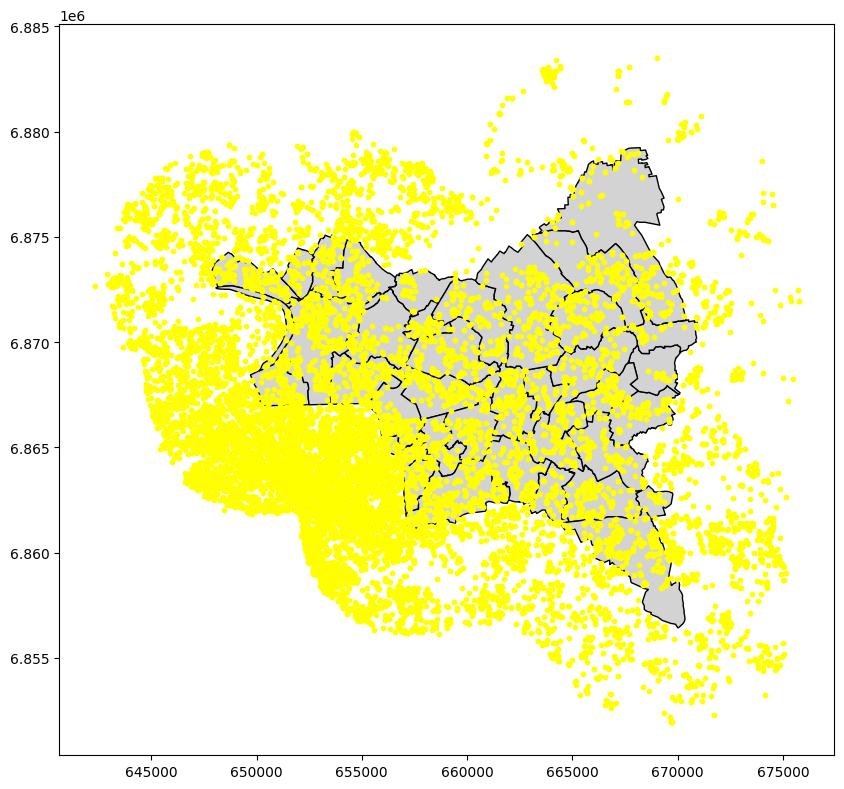

In [ ]:
# Afficher les deux GeoDataFrames sur la même carte
fig, ax = plt.subplots(figsize=(10, 10))

# Afficher les communes
join_93_evol_pop.plot(ax=ax, color='lightgrey', edgecolor='black')

# Afficher les toponymes de services et activités
services_gdf.plot(ax=ax, color='yellow', marker='o', markersize=10)

# Afficher la carte
plt.show()


**Filtre spatial des points**
Utilisation de l'opérateur spatial 'within' pour faire la jointure entre les géométries polygonales et ponctuelles

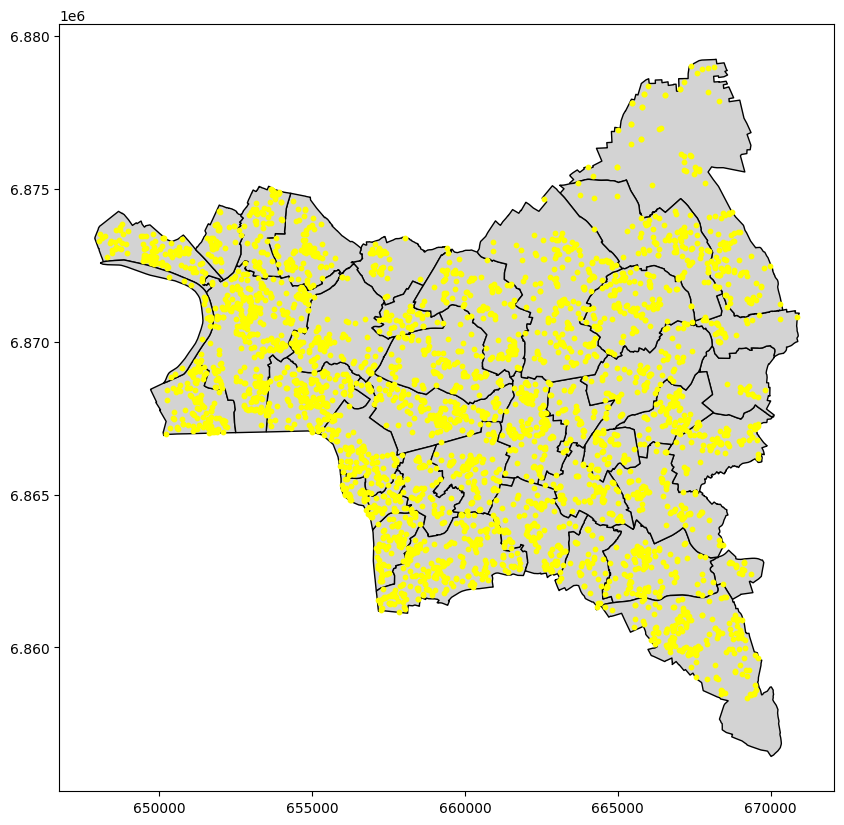

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Filtrer les points qui se trouvent à l'intérieur des polygones de communes
services_in_communes = gpd.sjoin(services_gdf, join_93_evol_pop, predicate='within')

# Afficher les deux GeoDataFrames sur la même carte
fig, ax = plt.subplots(figsize=(10, 10))

# Afficher les communes
join_93_evol_pop.plot(ax=ax, color='lightgrey', edgecolor='black')

# Afficher les toponymes de services et activités dans les communes
services_in_communes.plot(ax=ax, color='yellow', marker='o', markersize=10)

# Afficher la carte
plt.show()


In [ ]:
services_in_communes

,ID,CLASSE,NATURE,GRAPHIE,SOURCE,STATUT_TOP,DATE_TOP,LANGUE,geometry,CODGEO,...,C08_POP55P_CS7,C08_POP55P_CS8,P19_POP_log,P08_POP_log,label_class_pop2008,label_class_pop2013,label_class_pop2019,diff_2013_2008,diff_2019_2013,diff_2019_2008
0,SURFACTI0000002200044540,Zone d'activité ou d'intérêt,Espace public,parvis arnaud beltrame,Mairie information officielle,Collecté,2018-12-04,None,POINT (668569.148 6866977.15),93047,...,3833.693798,723.161581,10.237421,10.104713,moyenne,moyenne,moyenne,1488.0,1983.0,3471.0
2,SURFACTI0000000358975235,Zone d'activité ou d'intérêt,Piscine,piscine des hauts de montreuil,Ministère,Collecté,1900-01-01,None,POINT (660637.84 6862868.05),93048,...,13504.810440,2077.194972,11.619454,11.534462,grande,grande,grande,1963.0,7101.0,9064.0
13,SURFACTI0000000002554924,Zone d'activité ou d'intérêt,Maison de retraite,ehpad saint-joseph,Ministère,Collecté,2011-07-26,None,POINT (666613.559 6860611.55),93051,...,7718.752647,1181.128892,11.125379,11.052587,grande,grande,grande,-272.0,5037.0,4765.0
19,SURFACTI0000000244244912,Zone d'activité ou d'intérêt,Structure d'accueil pour personnes handicapées,esat iris-messidor,Ministère,Collecté,2015-06-05,None,POINT (658157.7 6867316.3),93008,...,5178.426597,933.562766,10.903457,10.773253,moyenne,moyenne,grande,2076.0,4561.0,6637.0
27,SURFACTI0000000332272620,Zone d'activité ou d'intérêt,Complexe sportif couvert,complexe sportif et culturel coubron,Ministère,Collecté,1900-01-01,None,POINT (669582.111 6868208.5),93015,...,804.909851,83.708772,8.501470,8.450412,petite,petite,petite,37.0,208.0,245.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12117,SURFACTI0000002323651173,Zone d'activité ou d'intérêt,Zone industrielle,docks de saint-ouen,IGN,Validé,2000-09-19,None,POINT (650233.397 6868087.1),93070,...,5370.013749,986.357781,10.833642,10.727575,moyenne,moyenne,grande,1939.0,3163.0,5102.0
12118,SURFACTI0000002323651163,Zone d'activité ou d'intérêt,Zone industrielle,docks de saint-ouen,IGN,Validé,2000-09-19,None,POINT (650837.126 6867779.15),93070,...,5370.013749,986.357781,10.833642,10.727575,moyenne,moyenne,grande,1939.0,3163.0,5102.0
12119,SURFACTI0000002200115487,Zone d'activité ou d'intérêt,Culte chrétien,église sainte-thérèse,Mairie,Collecté,2023-09-01,None,POINT (667424.115 6863881.5),93032,...,6700.741289,718.843795,10.588149,10.554327,moyenne,moyenne,moyenne,934.0,385.0,1319.0
12186,SURFACTI0000002334286465,Zone d'activité ou d'intérêt,Sous-préfecture,sous-préfecture de l'arrondissement de saint-d...,IGN,Validé,2010-10-08,None,POINT (652518.1 6870751.1),93066,...,10489.159171,2468.985035,11.633841,11.549672,grande,grande,grande,5601.0,3509.0,9110.0


In [ ]:
services_in_communes['NATURE'].unique()

array(['Espace public', 'Piscine', 'Maison de retraite',
       "Structure d'accueil pour personnes handicapées",
       'Complexe sportif couvert', 'Etablissement hospitalier',
       'Divers industriel', 'Hôpital', 'Marché',
       'Etablissement pénitentiaire', 'Centre de documentation',
       'Culte chrétien', 'Divers commercial', 'Zone industrielle',
       'Musée', 'Lycée', 'Stade', 'Parc des expositions',
       'Ouvrage militaire', 'Autre équipement sportif', 'Poste',
       'Enseignement primaire', "Autre établissement d'enseignement",
       'Collège', 'Police', 'Monument', 'Enseignement supérieur',
       'Divers public ou administratif', 'Mairie',
       "Autre service déconcentré de l'Etat", 'Ecomusée',
       'Salle de spectacle ou conférence', 'Parc de loisirs',
       'Culte musulman', 'Caserne de pompiers', 'Culte divers',
       'Sous-préfecture', "Station d'épuration", "Siège d'EPCI", 'Usine',
       'Déchèterie', 'Université', 'Palais de justice',
       'Office de

Cartographie selon les natures de points d'activité et de service

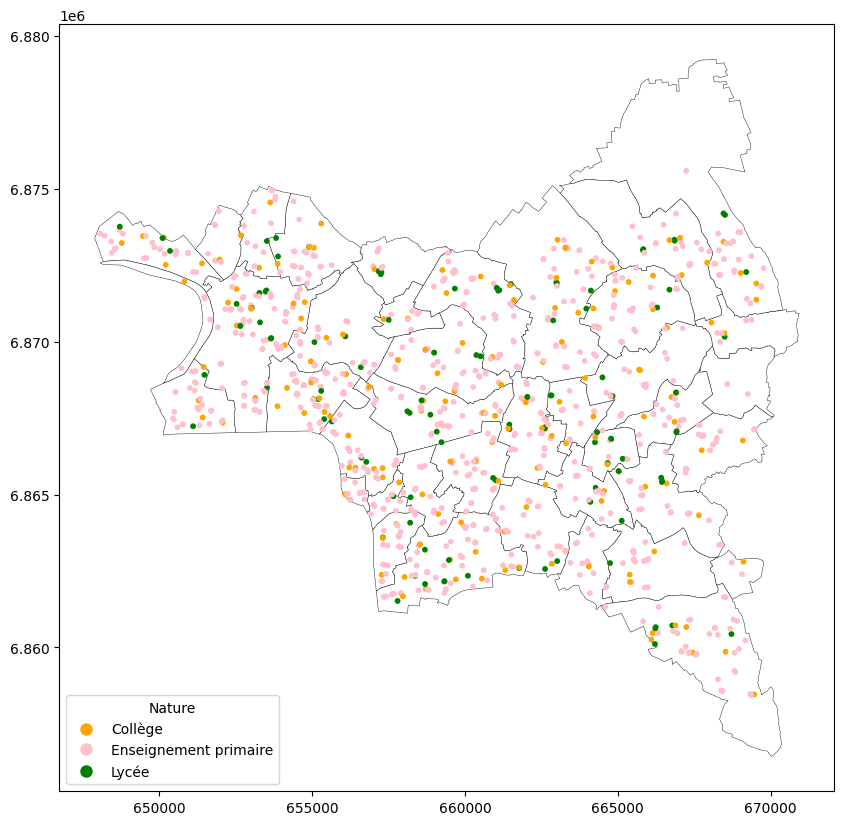

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Définir les catégories fermées et les couleurs correspondantes
categories = ['Collège', 'Enseignement primaire', 'Lycée']
colors = {'Collège': 'orange', 'Enseignement primaire': 'pink', 'Lycée': 'green'}

# Créer la figure et l'axe
fig, ax = plt.subplots(figsize=(10, 10))

# Afficher les communes
join_93_evol_pop.plot(ax=ax, color='white', edgecolor='black', linewidth=0.3)

# Utiliser GeoPandas plot pour colorier les points par catégorie avec des couleurs spécifiques
services_in_communes_filtered = services_in_communes[services_in_communes['NATURE'].isin(categories)]
services_in_communes_filtered.plot(
    ax=ax, c=services_in_communes_filtered['NATURE'].map(colors),
    markersize=10, legend=True, legend_kwds={'loc': 'lower left'}, categorical=True)

# Ajouter une légende personnalisée
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=category, markerfacecolor=colors[category], markersize=10) for category in categories]
ax.legend(handles=legend_elements, title='Nature', bbox_to_anchor=(0.0, 0.0), loc='lower left')


# Afficher la carte
plt.show()


In [ ]:
output_shapefile_path = 'services_in_communes_93_filtered.shp'
services_in_communes_filtered.to_file(output_shapefile_path)

<ipython-input-146-2ea3f96e2089>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  services_in_communes_filtered.to_file(output_shapefile_path)
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Field DATE_TOP create as date field, though DateTime requested.
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'P19_POP0014' to 'P19_POP001'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'P19_POP1529' to 'P19_POP152'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'P19_POP3044' to 'P19_POP304'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'P19_POP4559' to 'P19_POP455'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/